In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, GeoDataFrame, read_file

In [2]:
sby = gpd.read_file("kec_surabaya.geojson")

In [3]:
sby.head()

,SHAPE_Leng,SHAPE_Area,KECAMATAN,AREA,ID,geometry
0,0.101328,0.000338,WIYUNG,SELATAN,29,"MULTIPOLYGON Z (((112.69286 -7.32269 0.00000, ..."
1,0.057747,0.000130,MULYOREJO,SELATAN,15,"MULTIPOLYGON Z (((112.76453 -7.27695 0.00000, ..."
2,0.029927,0.000054,WONOCOLO,SELATAN,30,"MULTIPOLYGON Z (((112.74232 -7.32963 0.00000, ..."
3,0.051753,0.000070,GUNUNG ANYAR,SELATAN,9,"MULTIPOLYGON Z (((112.78812 -7.33220 0.00000, ..."
4,0.076003,0.000248,ASEMROWO,BARAT,1,"MULTIPOLYGON Z (((112.71768 -7.24522 0.00000, ..."


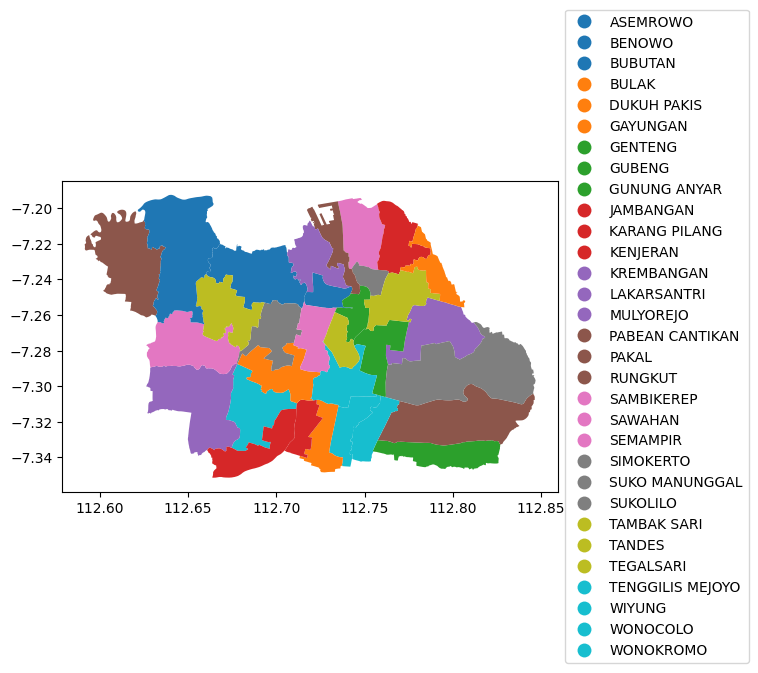

In [4]:
ax = sby.plot(column = 'KECAMATAN', categorical=True, legend = True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'fmt': "{:.0f}"})

In [5]:
import pandas as pd

In [25]:
penduduk = pd.read_csv('knn_surabaya.csv')

In [26]:
penduduk

,ID,Kepadatan_penduduk,Populasi
0,1,2886,45651
1,2,2886,72228
2,3,23193,90683
3,4,7051,44564
4,5,5488,56802
5,6,6991,41317
6,7,13065,53435
7,8,15649,124096
8,9,6209,62649
9,10,12285,50616


In [9]:
penduduk

,ID,Penduduk,Luas(m2)
0,1,45592,15820
1,2,71062,25030
2,3,90650,3910
3,4,44155,6320
4,5,56746,10350
5,6,41297,5910
6,7,53170,4090
7,8,124008,7930
8,9,62556,10090
9,10,50535,4120


In [28]:
sby2 = sby.merge(penduduk,on = 'ID')

In [29]:
sby2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SHAPE_Leng          31 non-null     float64 
 1   SHAPE_Area          31 non-null     float64 
 2   KECAMATAN           31 non-null     object  
 3   AREA                31 non-null     object  
 4   ID                  31 non-null     int64   
 5   geometry            31 non-null     geometry
 6   Kepadatan_penduduk  31 non-null     int64   
 7   Populasi            31 non-null     int64   
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 2.1+ KB


In [30]:
sby2.head()

,SHAPE_Leng,SHAPE_Area,KECAMATAN,AREA,ID,geometry,Kepadatan_penduduk,Populasi
0,0.101328,0.000338,WIYUNG,SELATAN,29,"MULTIPOLYGON Z (((112.69286 -7.32269 0.00000, ...",5908,71725
1,0.057747,0.000130,MULYOREJO,SELATAN,15,"MULTIPOLYGON Z (((112.76453 -7.27695 0.00000, ...",4968,86639
2,0.029927,0.000054,WONOCOLO,SELATAN,30,"MULTIPOLYGON Z (((112.74232 -7.32963 0.00000, ...",11518,75442
3,0.051753,0.000070,GUNUNG ANYAR,SELATAN,9,"MULTIPOLYGON Z (((112.78812 -7.33220 0.00000, ...",6209,62649
4,0.076003,0.000248,ASEMROWO,BARAT,1,"MULTIPOLYGON Z (((112.71768 -7.24522 0.00000, ...",2886,45651


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

In [33]:
data_sby = sby2[['Kepadatan_penduduk']]
scaler = StandardScaler()
data_sby_scaled = scaler.fit_transform(data_sby)
data_sby_scaled.shape

(31, 1)

In [63]:
data_sby_scaled

array([[-0.74022401],
       [-0.859033  ],
       [-0.03116188],
       [-0.70217986],
       [-1.12218226],
       [ 1.444471  ],
       [-1.09033134],
       [-0.6033409 ],
       [ 0.93839528],
       [ 0.0657812 ],
       [ 0.4909657 ],
       [-0.79330888],
       [ 0.72706696],
       [-0.49805591],
       [ 2.70751164],
       [-1.01575975],
       [-0.0799494 ],
       [-0.79697426],
       [ 1.20874892],
       [ 1.86485259],
       [-1.06935018],
       [-0.3102366 ],
       [ 0.16436738],
       [ 1.20078619],
       [ 0.1691703 ],
       [ 0.1149479 ],
       [-1.12218226],
       [-1.02233216],
       [ 1.54899763],
       [-0.19370268],
       [-0.59575734]])

In [62]:
kmeans.labels_

array([4, 4, 7, 4, 0, 1, 0, 4, 6, 2, 6, 4, 6, 4, 3, 0, 7, 4, 1, 5, 0, 7,
       2, 1, 2, 2, 0, 0, 5, 7, 4])

In [77]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_init=num_clusters, max_iter=50)
    kmeans.fit(sby2[['Kepadatan_penduduk']])
    cluster_labels =  kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data_sby_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5150105498155085
For n_clusters=3, the silhouette score is 0.5593139457633838
For n_clusters=4, the silhouette score is 0.5441299881929522
For n_clusters=5, the silhouette score is 0.5228925717942327
For n_clusters=6, the silhouette score is 0.5441299881929522
For n_clusters=7, the silhouette score is 0.5295997366508861
For n_clusters=8, the silhouette score is 0.5593139457633838


In [78]:
scaler=StandardScaler()
wcc=[]
for i in range (1,10):
    km=KMeans(n_clusters=i)
    km.fit(scaler.fit_transform(sby2[['Kepadatan_penduduk']]))
    wcc.append(km.inertia_)

C:\Users\Faiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Faiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Faiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Faiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

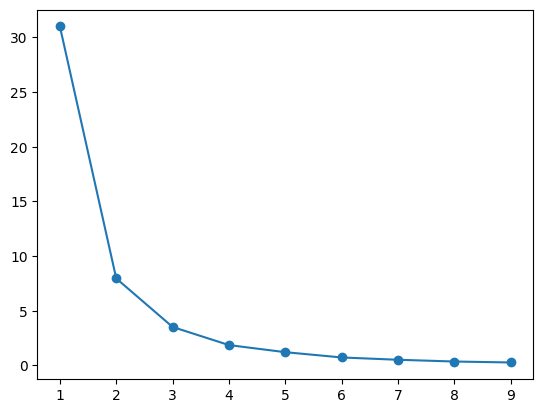

In [79]:
plt.plot(range(1,10), wcc, marker='o')

In [48]:
#init sesuai dengan pehitungan di atas
cluster=KMeans(n_clusters=3).fit_predict(scaler.fit_transform(sby2[['Kepadatan_penduduk']]))
sby2['KM4Cluster']=cluster

C:\Users\Faiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


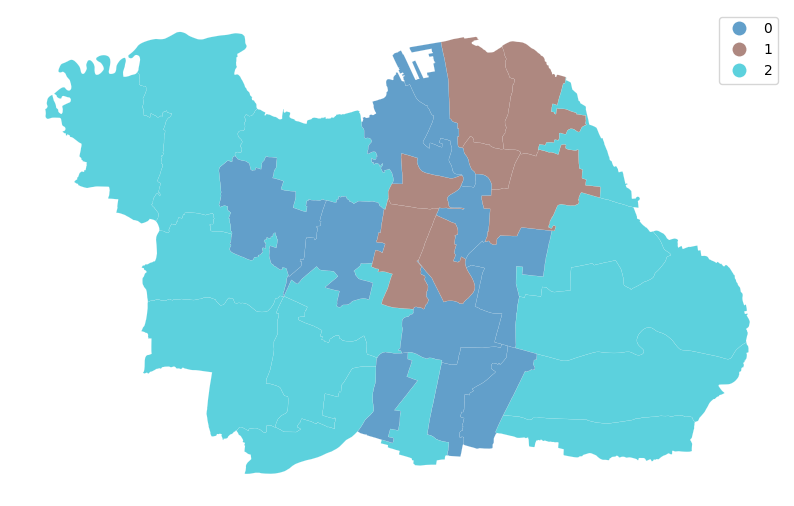

In [51]:
f, axes=plt.subplots(figsize=(10,10))
sby2.assign(cl=cluster).cx[:,:45].plot(column='cl', categorical=True, ax=axes, edgecolor='white', linewidth=0.1, alpha=0.7, legend=True)
axes.set_axis_off()

In [52]:
sby2

,SHAPE_Leng,SHAPE_Area,KECAMATAN,AREA,ID,geometry,Kepadatan_penduduk,Populasi,KM4Cluster
0,0.101328,3.378533e-04,WIYUNG,SELATAN,29,"MULTIPOLYGON Z (((112.69286 -7.32269 0.00000, ...",5908,71725,2
1,0.057747,1.295290e-04,MULYOREJO,SELATAN,15,"MULTIPOLYGON Z (((112.76453 -7.27695 0.00000, ...",4968,86639,2
2,0.029927,5.351237e-05,WONOCOLO,SELATAN,30,"MULTIPOLYGON Z (((112.74232 -7.32963 0.00000, ...",11518,75442,0
3,0.051753,7.029639e-05,GUNUNG ANYAR,SELATAN,9,"MULTIPOLYGON Z (((112.78812 -7.33220 0.00000, ...",6209,62649,2
4,0.076003,2.481919e-04,ASEMROWO,BARAT,1,"MULTIPOLYGON Z (((112.71768 -7.24522 0.00000, ...",2886,45651,2
5,0.044603,6.779537e-05,BUBUTAN,PUSAT,3,"MULTIPOLYGON Z (((112.73613 -7.24463 0.00000, ...",23193,90683,1
6,0.111123,3.063970e-04,LAKARSANTRI,BARAT,14,"MULTIPOLYGON Z (((112.66215 -7.33461 0.00000, ...",3138,59710,2
7,0.060516,1.379071e-04,GAYUNGAN,SELATAN,6,"MULTIPOLYGON Z (((112.73008 -7.33734 0.00000, ...",6991,41317,2
8,0.025585,3.284054e-05,SEMAMPIR,UTARA,21,"MULTIPOLYGON Z (((112.75523 -7.23436 0.00000, ...",19189,70885,1
9,0.060178,1.280195e-04,JAMBANGAN,SELATAN,10,"MULTIPOLYGON Z (((112.71655 -7.33830 0.00000, ...",12285,50616,0


In [105]:
sby3 = sby2.to_dict()

In [122]:
panjang = len(sby3['KM4Cluster'])

In [128]:
klasifikasi6 = list()
for i in range(0,panjang):
    if sby3['KM4Cluster'][i] == 0:
        klasifikasi6.append("padat")
    elif sby3['KM4Cluster'][i] == 1:
        klasifikasi6.append("cukup")
    else:
        klasifikasi6.append('tidak_padat')

In [129]:
klasifikasi6

['tidak_padat',
 'tidak_padat',
 'padat',
 'tidak_padat',
 'tidak_padat',
 'cukup',
 'tidak_padat',
 'tidak_padat',
 'cukup',
 'padat',
 'padat',
 'tidak_padat',
 'padat',
 'tidak_padat',
 'cukup',
 'tidak_padat',
 'padat',
 'tidak_padat',
 'cukup',
 'cukup',
 'tidak_padat',
 'padat',
 'padat',
 'cukup',
 'padat',
 'padat',
 'tidak_padat',
 'tidak_padat',
 'cukup',
 'padat',
 'tidak_padat']

In [130]:
len(klasifikasi6)

31

In [131]:
sby2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SHAPE_Leng          31 non-null     float64 
 1   SHAPE_Area          31 non-null     float64 
 2   KECAMATAN           31 non-null     object  
 3   AREA                31 non-null     object  
 4   ID                  31 non-null     int64   
 5   geometry            31 non-null     geometry
 6   Kepadatan_penduduk  31 non-null     int64   
 7   Populasi            31 non-null     int64   
 8   KM4Cluster          31 non-null     int32   
dtypes: float64(2), geometry(1), int32(1), int64(3), object(2)
memory usage: 2.2+ KB


In [133]:
klas = gpd.GeoDataFrame(sby3)
klas['KM4Cluster']=klasifikasi6

In [134]:
klas

,SHAPE_Leng,SHAPE_Area,KECAMATAN,AREA,ID,geometry,Kepadatan_penduduk,Populasi,KM4Cluster
0,0.101328,3.378533e-04,WIYUNG,SELATAN,29,"MULTIPOLYGON Z (((112.69286 -7.32269 0.00000, ...",5908,71725,tidak_padat
1,0.057747,1.295290e-04,MULYOREJO,SELATAN,15,"MULTIPOLYGON Z (((112.76453 -7.27695 0.00000, ...",4968,86639,tidak_padat
2,0.029927,5.351237e-05,WONOCOLO,SELATAN,30,"MULTIPOLYGON Z (((112.74232 -7.32963 0.00000, ...",11518,75442,padat
3,0.051753,7.029639e-05,GUNUNG ANYAR,SELATAN,9,"MULTIPOLYGON Z (((112.78812 -7.33220 0.00000, ...",6209,62649,tidak_padat
4,0.076003,2.481919e-04,ASEMROWO,BARAT,1,"MULTIPOLYGON Z (((112.71768 -7.24522 0.00000, ...",2886,45651,tidak_padat
5,0.044603,6.779537e-05,BUBUTAN,PUSAT,3,"MULTIPOLYGON Z (((112.73613 -7.24463 0.00000, ...",23193,90683,cukup
6,0.111123,3.063970e-04,LAKARSANTRI,BARAT,14,"MULTIPOLYGON Z (((112.66215 -7.33461 0.00000, ...",3138,59710,tidak_padat
7,0.060516,1.379071e-04,GAYUNGAN,SELATAN,6,"MULTIPOLYGON Z (((112.73008 -7.33734 0.00000, ...",6991,41317,tidak_padat
8,0.025585,3.284054e-05,SEMAMPIR,UTARA,21,"MULTIPOLYGON Z (((112.75523 -7.23436 0.00000, ...",19189,70885,cukup
9,0.060178,1.280195e-04,JAMBANGAN,SELATAN,10,"MULTIPOLYGON Z (((112.71655 -7.33830 0.00000, ...",12285,50616,padat


<Axes: >

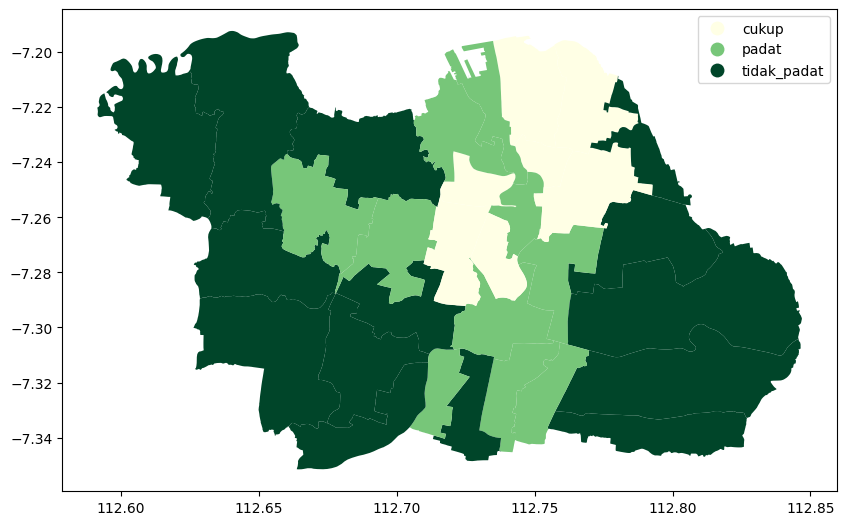

In [135]:
klas.plot(column='KM4Cluster', cmap='YlGn', figsize=(10,10), legend=True)